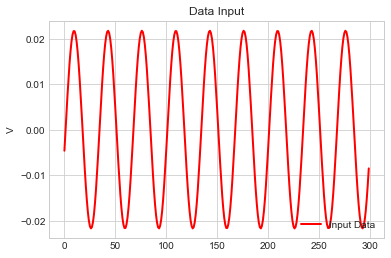

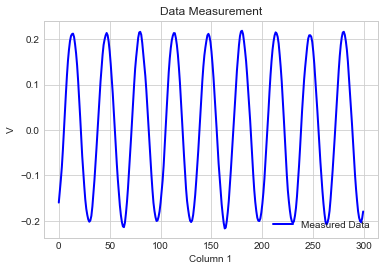

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Define the file name containing Chinese characters
file_name = '20230321_sensor1_标定正弦30Hz_15点43mVrms'

# Read the file and extract the data columns
data = np.loadtxt(file_name)
col1 = data[:, 0]
col2 = data[:, 1]

cropCol1 = col1[1000:1300]
cropCol2 = col2[1000:1300]

Binput = cropCol2 * 1000 * 4.608 # V -- > mV --> pT 

# Create a Scientific style plot
plt.figure()
plt.style.use('seaborn-whitegrid')
plt.plot(cropCol2, linewidth=2, color='red', label='Input Data')
plt.title('Data Input')
plt.ylabel('V')
plt.legend(loc='lower right')
plt.show()

plt.figure()
plt.style.use('seaborn-whitegrid')
plt.plot(cropCol1, linewidth=2, color='blue', label='Measured Data')
plt.title('Data Measurement')
plt.xlabel('Column 1')
plt.ylabel('V')
plt.legend(loc='lower right')
plt.show()


In [14]:
import numpy as np
'''
KF & linear system
x = Ax + Bu + C
z = Dx + E

'''
Kscale = 58199
Phi = 0.0

# Define the state transition matrix
A = np.array([[0.]])

# Define the control input matrix
B = np.array([[1.595*1e-4]])

# Define the control input vector
#u = np.array([[0.5]])

# Define the measurement matrix
D = np.array([[Kscale]])

# Define the process noise covariance matrix
Q = np.array([[1e-10]])

# Define the measurement noise covariance matrix
R = np.array([[1]])

# Initialize the state vector
x = np.array([[0.]])

# Initialize the state covariance matrix
P = np.array([[1]])

# Define the measurement vector
#z = np.array([[1.2]])

# Define the constant term matrices
C = np.array([[0.0]])
E = np.array([[Phi]])
zPred = []

yMeasure = cropCol1 * 1000 # V --> mV
BInput = Binput

# Run the Kalman filter
for i in range(len(BInput)):
    u = np.asarray([BInput[i]])
    z = np.asarray([yMeasure[i]])
    # Predict the next state estimate and covariance
    x = A @ x + B @ u + C
    P = A @ P @ A.T + Q
    
    # Update the state estimate and covariance using the measurement
    K = P @ D.T @ np.linalg.inv(D @ P @ D.T + R)
    x = x + K @ (z - D @ x - E)
    
    zPred.append(D@x+E)
    
    P = (np.eye(1) - K @ D) @ P
    
    # Print the updated state estimate
    #print('x =', x[0][0])
zPred = np.asarray(zPred).reshape(-1)
zRef = 2.158 * BInput


L2 norm :  7169.853686126418


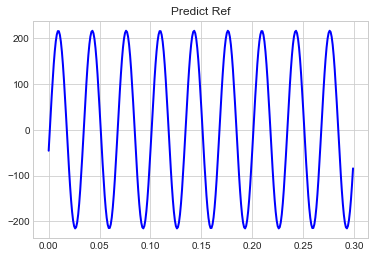

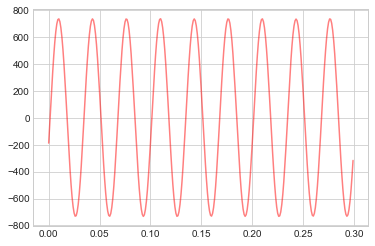

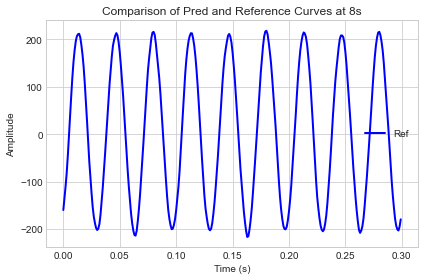

In [15]:
timeRange = np.array([1/1000 * i for i in range(len(BInput))])
plt.figure()
plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
plt.title('Predict Ref')

plt.figure()
#plt.plot(timeRange[::2], zPred[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.plot(timeRange, zPred, markersize=5, linestyle='-', label='Pred', alpha=0.5,color='red')
plt.figure()
plt.plot(timeRange, yMeasure, linestyle='-', linewidth=2, label='Ref', color='blue')
print('L2 norm : ', np.linalg.norm(zPred - yMeasure))
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Comparison of Pred and Reference Curves at 8s')

plt.legend()
plt.tight_layout()  # Optional: Adjusts the plot to fit the labels and title
plt.show()

Text(0.5, 1.0, 'KF estimate on the Measure curve')

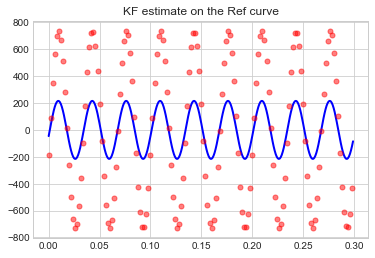

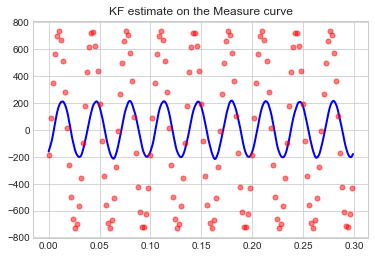

In [16]:
plt.figure()
plt.plot(timeRange, zRef, linestyle='-', linewidth=2, label='Ref', color='blue')
plt.plot(timeRange[::2], zPred[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.title('KF estimate on the Ref curve')

plt.figure()
plt.plot(timeRange, yMeasure, linestyle='-', linewidth=2, label='Ref', color='blue')
plt.plot(timeRange[::2], zPred[::2], 'o', markersize=5, linestyle='', label='Pred', alpha=0.5,color='red')
plt.title('KF estimate on the Measure curve')
